In [3]:
#installing the kaggle library 
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
#configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d omkargurav/face-mask-dataset

 97% 158M/163M [00:00<00:00, 199MB/s]
100% 163M/163M [00:00<00:00, 208MB/s]


In [26]:
#unzipping the zip file
from zipfile import ZipFile

dataset = "/content/face-mask-dataset.zip"

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("the ds is extracted")

the ds is extracted


In [27]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [28]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image 
from sklearn.model_selection import train_test_split

In [29]:
with_mask_files = os.listdir('/content/data/with_mask')
without_mask_files = os.listdir('/content/data/without_mask')

In [30]:
print(with_mask_files[0:5])

['with_mask_254.jpg', 'with_mask_948.jpg', 'with_mask_723.jpg', 'with_mask_3470.jpg', 'with_mask_475.jpg']


In [31]:
print(without_mask_files[-5:])

['without_mask_2393.jpg', 'without_mask_3516.jpg', 'without_mask_1573.jpg', 'without_mask_2239.jpg', 'without_mask_3094.jpg']


In [32]:
print("Number of mask images: ", len(with_mask_files))

Number of mask images:  3725


In [33]:
print("Number of non mask images: ", len(without_mask_files))

Number of non mask images:  3828


In [34]:
#with mask --> label 1
#without mask --> label 2

In [35]:
with_mask_labels = [1]*len(with_mask_files)
without_mask_labels = [0]*len(without_mask_files)

In [36]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [37]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [38]:
labels = with_mask_labels + without_mask_labels
print(len(labels))

7553


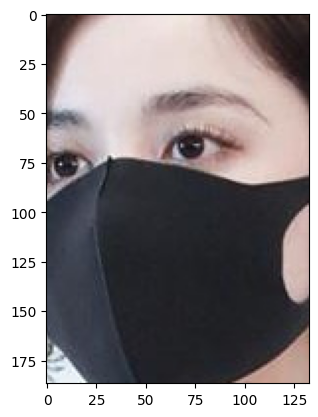

In [39]:
#displaying with mask image
img= mpimg.imread('/content/data/with_mask/with_mask_279.jpg')
imgplot = plt.imshow(img)
plt.show()

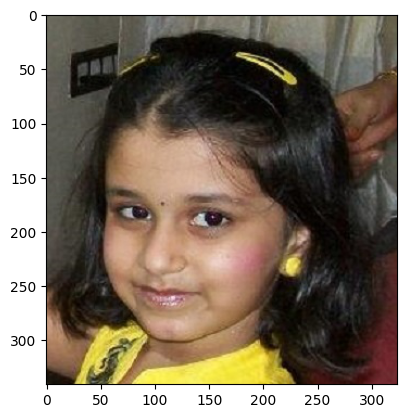

In [40]:
 #displaying with mask image
img= mpimg.imread('/content/data/without_mask/without_mask_3516.jpg')
imgplot = plt.imshow(img)
plt.show()

In [41]:
#image preprocessing 
#1. Resizing the image
#2. converting in numpy arrays

In [60]:
#for mask photos
with_mask_path = "/content/data/with_mask/"
data = []

for img_file in with_mask_files :

  image = Image.open(with_mask_path + img_file) #opening the image
  image = image.resize((128,128)) #resizing 
  image = image.convert('RGB') #converting to rgb
  image = np.array(image) #converting to np array
  data.append(image)


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [61]:
#for non mark photos

without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [62]:
len(data)

7553

In [63]:
len(labels)

7553

In [64]:
type(data[0])

numpy.ndarray

In [65]:
data[0].shape #hieght, width, colorchannel 

(128, 128, 3)

In [66]:
type(data)

list

In [67]:
# converting label list and image list to numpy arrays

x = np.array(data)
y = np.array(labels)

In [68]:
type(x)

numpy.ndarray

In [69]:
print(x.shape)
print(y.shape)

(7553, 128, 128, 3)
(7553,)


In [70]:
#Train Test Split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=3)

In [71]:
print(x.shape, x_train.shape, x_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [72]:
#scaling the data : reducing the data range from 0-255 to 0-1

x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [73]:
#Building a convolution neural networks

import tensorflow as tf   # developed by google, pytorch by youtube
from tensorflow import keras  #keras is a library, whose backend is tensorflow or pytorch 

In [74]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [75]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [77]:
# training the neural network
history = model.fit(x_train_scaled, y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 6s 21ms/step - loss: 0.4672 - acc: 0.7966 - val_loss: 0.3658 - val_acc: 0.8496
Epoch 2/5
170/170 [==============================] - 3s 16ms/step - loss: 0.2896 - acc: 0.8911 - val_loss: 0.2542 - val_acc: 0.8793
Epoch 3/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2224 - acc: 0.9126 - val_loss: 0.2718 - val_acc: 0.9025
Epoch 4/5
170/170 [==============================] - 3s 16ms/step - loss: 0.1903 - acc: 0.9277 - val_loss: 0.2459 - val_acc: 0.9025
Epoch 5/5
170/170 [==============================] - 3s 18ms/step - loss: 0.1546 - acc: 0.9386 - val_loss: 0.2362 - val_acc: 0.9157


In [79]:
#model evaluation

loss, accuracy = model.evaluate(x_test_scaled, y_test)
print(accuracy)

48/48 [==============================] - 0s 8ms/step - loss: 0.1937 - acc: 0.9272
0.9272005558013916


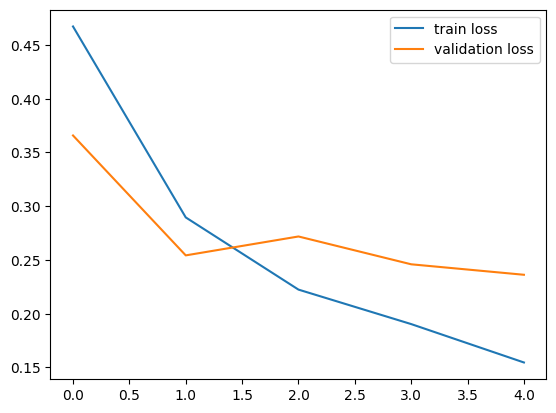

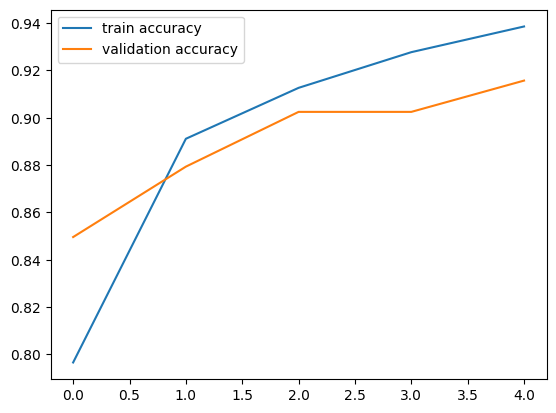

In [80]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

enter path of input image/content/jkb.jpg


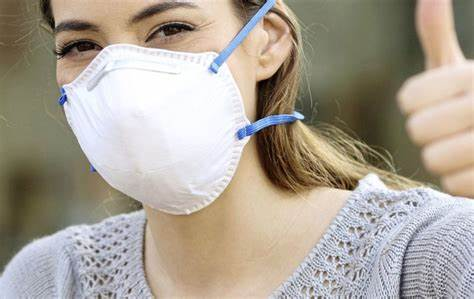

1/1 [==============================] - 0s 23ms/step
[[0.40387782 0.5532246 ]]
1
The person is wearing a mask, GOOD!


In [83]:
# predictive system

input_image_path = input("enter path of input image")

input_image= cv2.imread(input_image_path)
cv_imshow(input_image)

input_image_resize = cv2.resize(input_image, (128,128))
input_image_scales = input_image_resize/255

input_image_reshaped = np.reshape(input_image_scales, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)
input_pred_label = np.argmax(input_prediction)

print(input_pred_label)
if input_pred_label == 1:
  print('The person is wearing a mask, GOOD!')
else:
  print('The person is not wearing a mask, COVIDDDDD!')


enter path of input image/content/DGJFV.jpeg


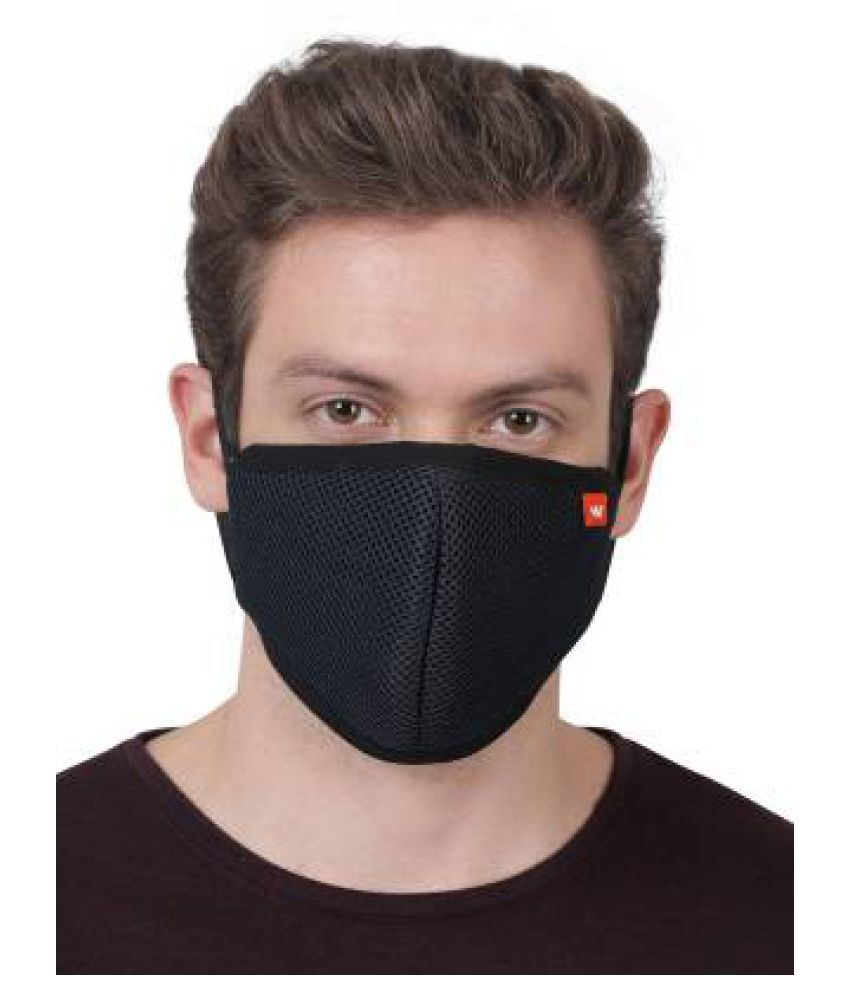

1/1 [==============================] - 0s 26ms/step
[[0.27053258 0.7255451 ]]
1
The person is wearing a mask, GOOD!


In [84]:
# predictive system

input_image_path = input("enter path of input image")

input_image= cv2.imread(input_image_path)
cv_imshow(input_image)

input_image_resize = cv2.resize(input_image, (128,128))
input_image_scales = input_image_resize/255

input_image_reshaped = np.reshape(input_image_scales, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)
input_pred_label = np.argmax(input_prediction)

print(input_pred_label)
if input_pred_label == 1:
  print('The person is wearing a mask, GOOD!')
else:
  print('The person is not wearing a mask, COVIDDDDD!')
